2025-04-29 17:43:28.494844: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-29 17:43:28.557422: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-29 17:43:29.515949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-04-29 17:43:31.148081: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 818 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capabil

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1745948617.225330 2902301 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Predicted Gender: Female


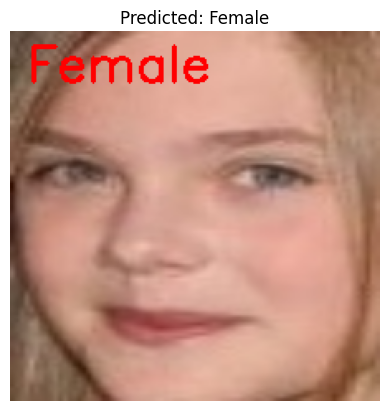

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import cv2

# Load the trained model
model = load_model('gggender_classifier_model.h5')

# Parameters
img_height = 224
img_width = 224
class_names = ['Female', 'Male']

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# Load and preprocess image
img_path = '/home/orbo/pushkar/Classification/training /testing/131486.jpg.jpg'
processed_img = preprocess_image(img_path)

# Predict
predictions = model.predict(processed_img)
predicted_class = np.argmax(predictions, axis=1)[0]
gender = class_names[predicted_class]
print(f"Predicted Gender: {gender}")

# Load original image (for visualization)
original_img = cv2.imread(img_path)
original_img = cv2.resize(original_img, (img_width, img_height))
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Add text on image
cv2.putText(original_img_rgb, gender, (10, 30),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1, color=(255, 0, 0), thickness=2)

# Show image with predicted label
plt.imshow(original_img_rgb)
plt.title(f"Predicted: {gender}")
plt.axis('off')
plt.show()